Dataset: `Bank Marketing`

`Dataset:` https://drive.google.com/file/d/1TYZK1AbrxTKoRGQ7paHIG-dxtk9G5I0b/view

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix

In [ ]:
df = pd.read_csv("/content/Bank Marketing.csv")
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.shape

(41188, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

numerical

In [ ]:
numerical_data = df.select_dtypes(include='number')
numerical_features=numerical_data.columns.tolist()
print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 10 numerical features: 

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


catagorical

In [ ]:
categorical_data=df.select_dtypes(include= 'object')
categorical_features=categorical_data.columns.tolist()
print(f'There are {len(categorical_features)} catagorical features:', '\n')
print(categorical_features)

There are 11 catagorical features: 

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
df['y'].value_counts()

,count
y,
no,36548
yes,4640


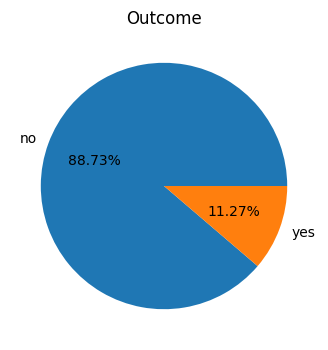

In [ ]:
outcome_count = df['y'].value_counts()
plt.figure(figsize = (4, 4))
plt.pie(outcome_count, labels = outcome_count.index, autopct = '%.2f%%')
plt.title('Outcome')
plt.show()

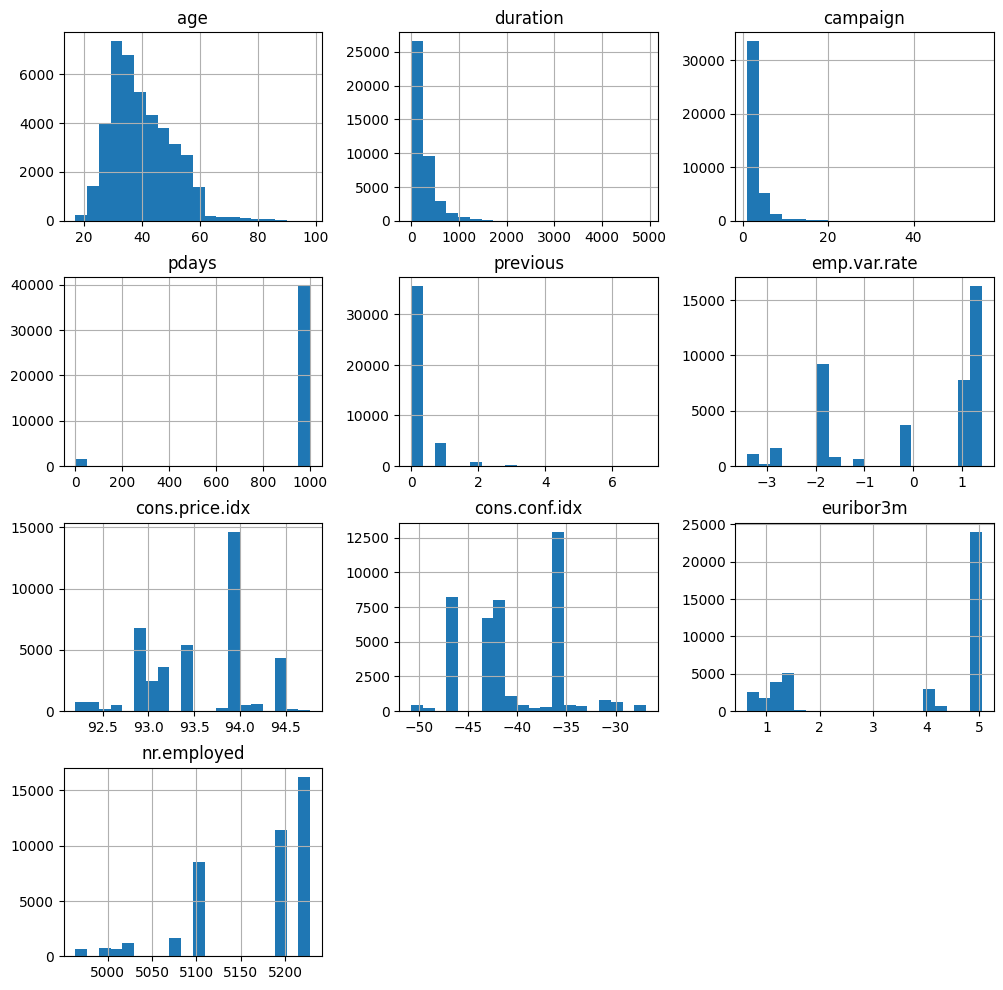

In [ ]:
# histogram
numerical_data.hist(figsize=(12,12),bins=20)
plt.show()

In [ ]:
numerical_data.skew()

,0
age,0.784697
duration,3.263141
campaign,4.762507
pdays,-4.922190
previous,3.832042
emp.var.rate,-0.724096
cons.price.idx,-0.230888
cons.conf.idx,0.303180
euribor3m,-0.709188
nr.employed,-1.044262


In [ ]:
numerical_data.isnull().sum()

,0
age,0
duration,0
campaign,0
pdays,0
previous,0
emp.var.rate,0
cons.price.idx,0
cons.conf.idx,0
euribor3m,0
nr.employed,0


In [ ]:
numerical_data.nunique()

,0
age,78
duration,1544
campaign,42
pdays,27
previous,8
emp.var.rate,10
cons.price.idx,26
cons.conf.idx,26
euribor3m,316
nr.employed,11


In [ ]:
df['y'] = df['y'].map({'no':0, 'yes':1})

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


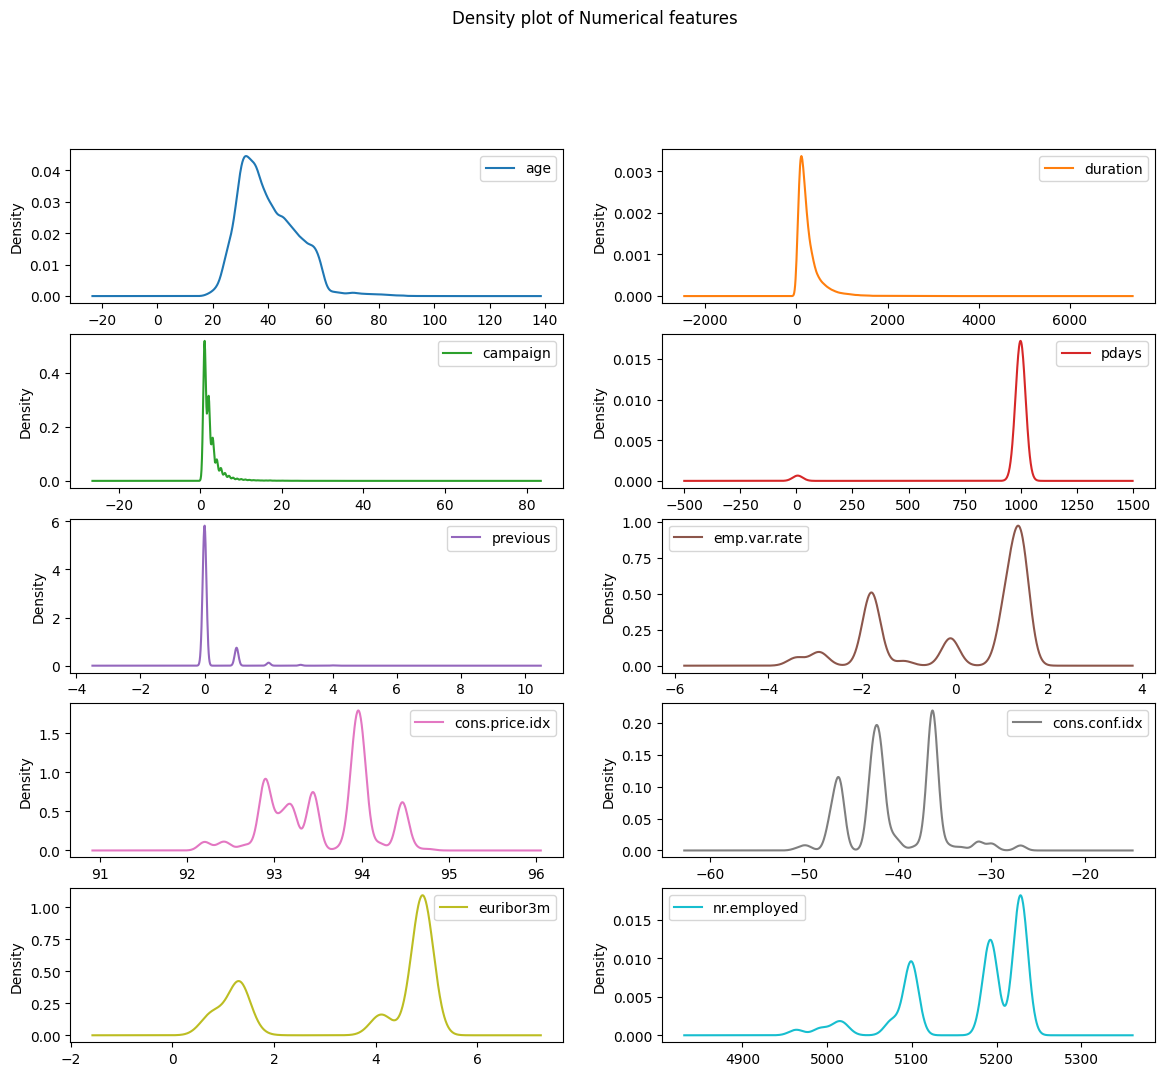

In [ ]:
# density plot
numerical_data.plot(kind='density',figsize=(14,14),subplots=True,layout=(6,2),title="Density plot of Numerical features",sharex=False)
plt.show()

<ipython-input-221-b05139a65c62>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='y', y=column, palette='viridis')
<ipython-input-221-b05139a65c62>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='y', y=column, palette='viridis')
<ipython-input-221-b05139a65c62>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='y', y=column, palette='viridis')
<ipython-input-221-b05139a65c62>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable t

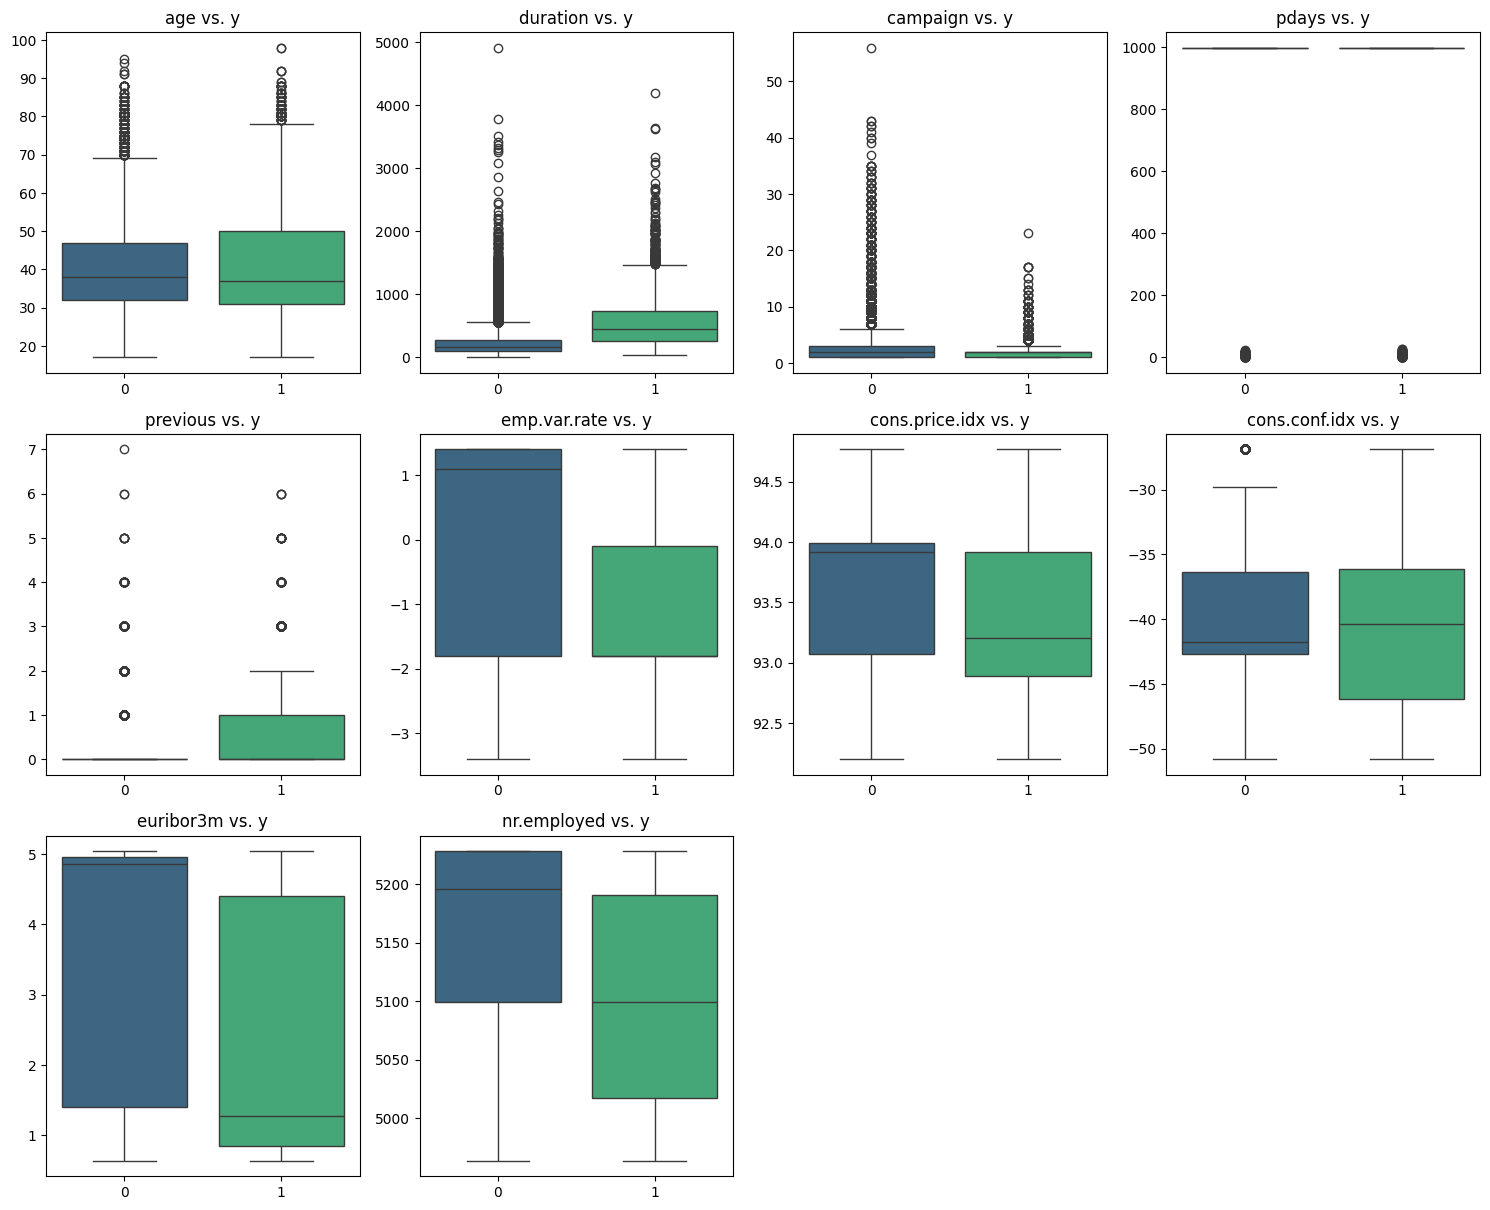

In [ ]:
# box plot
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
plt.figure(figsize=(15, 20))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(data=df, x='y', y=column, palette='viridis')
    plt.title(f'{column} vs. y')
    plt.xlabel(None)
    plt.ylabel(None)

plt.tight_layout()
plt.show()

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.select_dtypes(include=['number']).corr()
corr_matrix

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


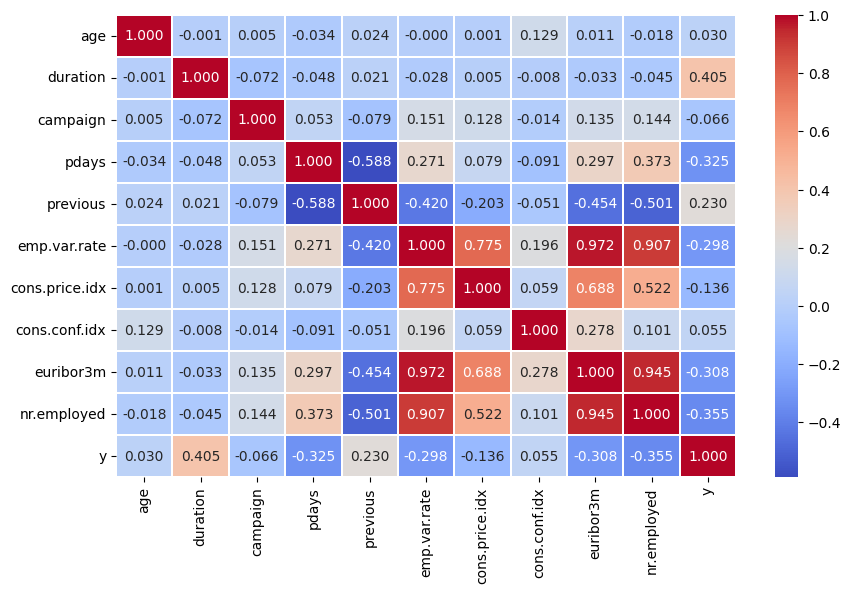

In [ ]:
# heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.3)
plt.show()

High correlation

In [ ]:
df.drop('emp.var.rate',axis=1,inplace=True)
df.drop('euribor3m',axis=1,inplace=True)

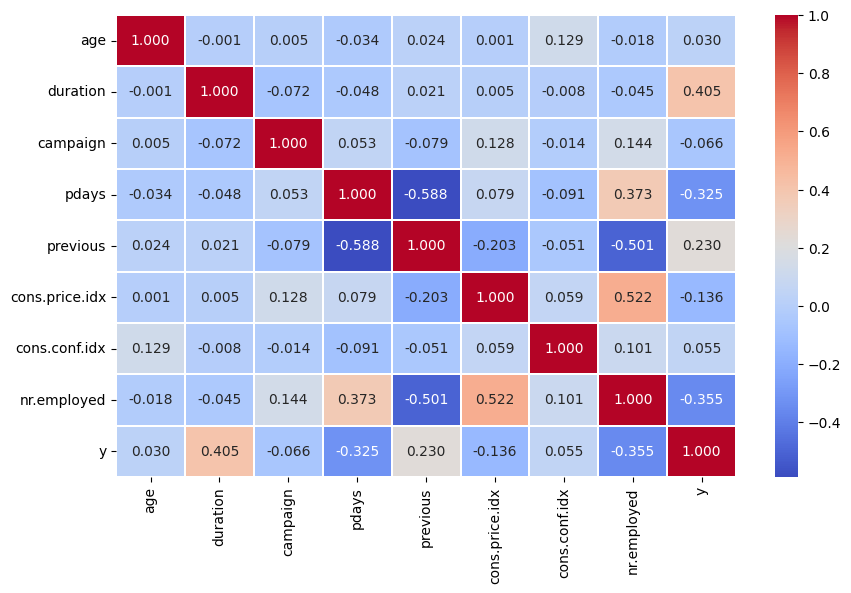

In [ ]:
corr_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.3)
plt.show()

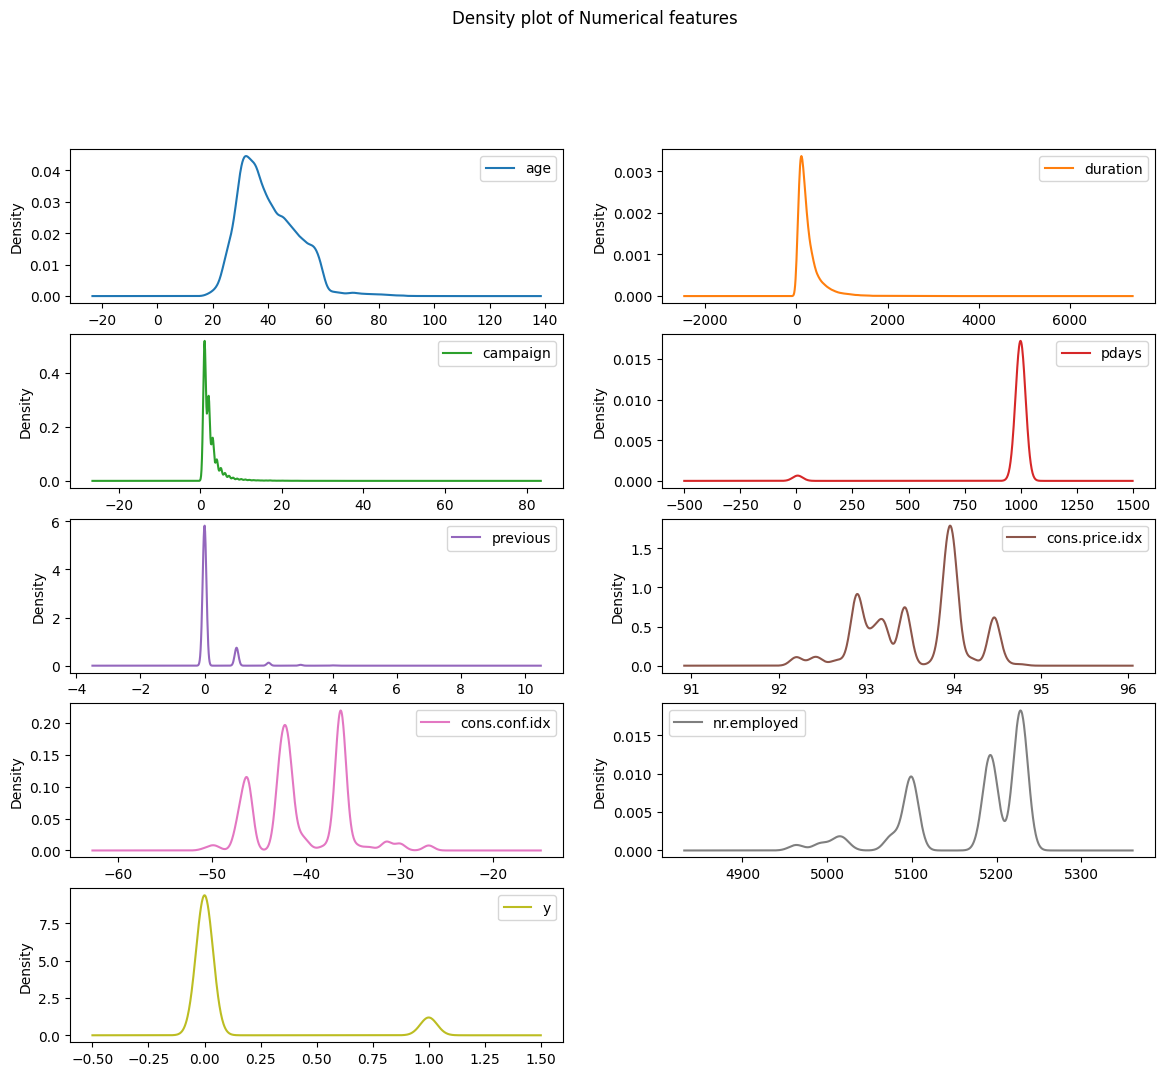

In [ ]:
numerical_data = df.select_dtypes(include='number')
numerical_data.plot(kind='density',figsize=(14,14),subplots=True,layout=(6,2),title="Density plot of Numerical features",sharex=False)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

In [ ]:
le = LabelEncoder()
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
for i in categorical:
    df[i] = le.fit_transform(df[i])
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,93.994,-36.4,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,93.994,-36.4,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,93.994,-36.4,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,93.994,-36.4,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,93.994,-36.4,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,334,1,999,0,1,94.767,-50.8,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,383,1,999,0,1,94.767,-50.8,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,189,2,999,0,1,94.767,-50.8,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,442,1,999,0,1,94.767,-50.8,4963.6,1


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
X = df.iloc[:, :-1]
y = df.loc[:,'y']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=24)

In [ ]:
print(X)
print(y)

       age  job  marital  education  default  housing  loan  contact  month  \
0       56    3        1          0        0        0     0        1      6   
1       57    7        1          3        1        0     0        1      6   
2       37    7        1          3        0        2     0        1      6   
3       40    0        1          1        0        0     0        1      6   
4       56    7        1          3        0        0     2        1      6   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183   73    5        1          5        0        2     0        0      7   
41184   46    1        1          5        0        0     0        0      7   
41185   56    5        1          6        0        2     0        0      7   
41186   44    9        1          5        0        0     0        0      7   
41187   74    5        1          5        0        2     0        0      7   

       day_of_week  duration  campaign  pdays  prev

scaling

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

models = {
    # "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

In [ ]:
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# # Random Forest
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# # Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# # NN
nn_model = MLPClassifier()
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


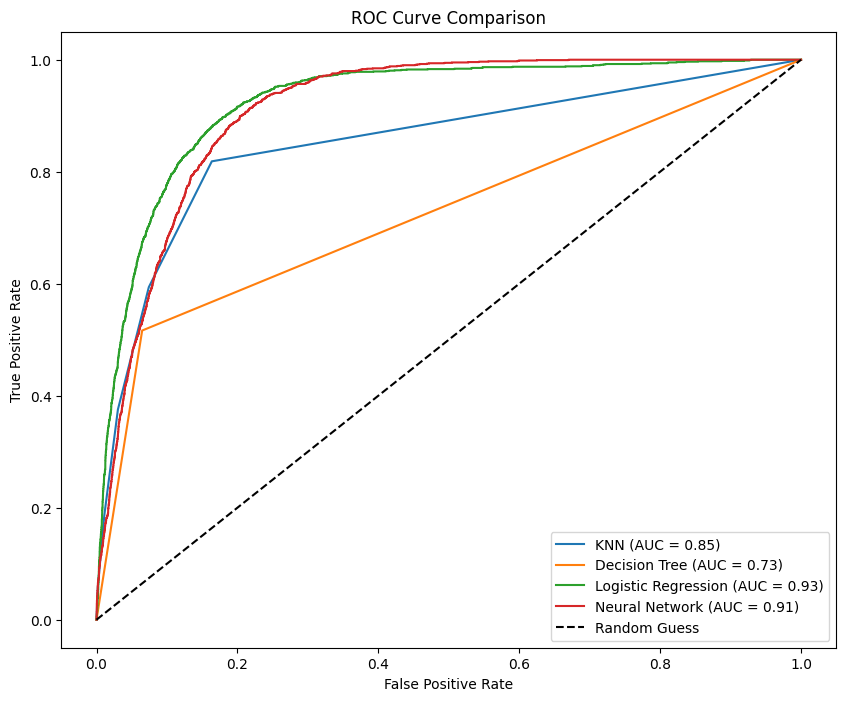

In [ ]:
plt.figure(figsize=(10, 8))
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_probs = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)  # ROC and AUC
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
# plt.grid()
plt.show()

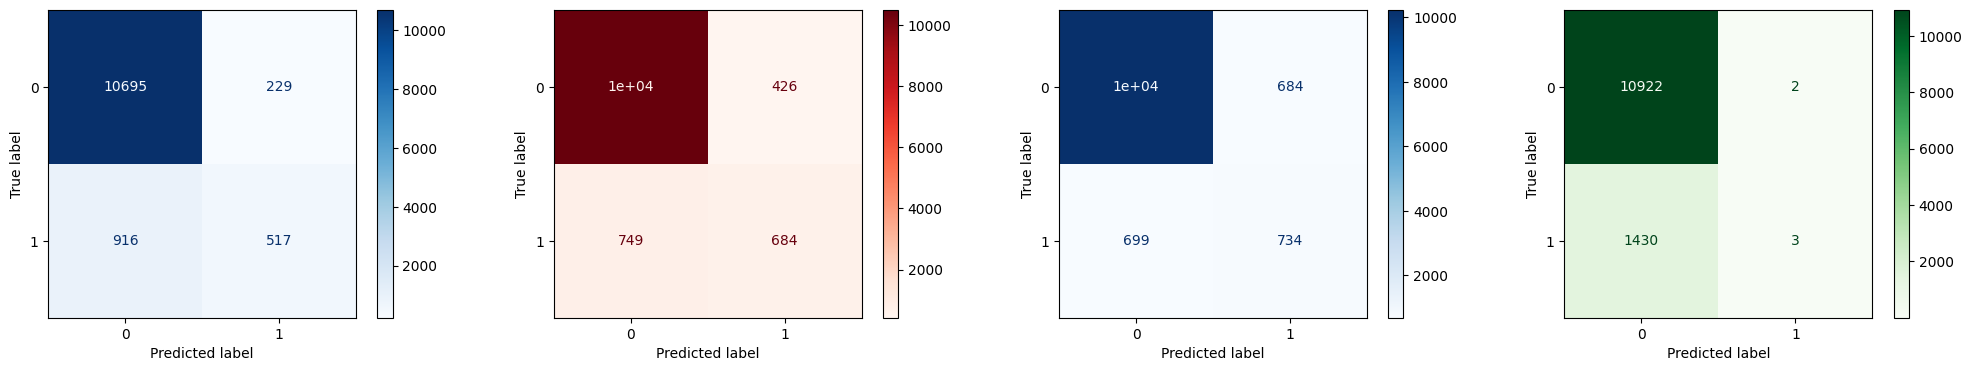

Logistic Regression Accuracy: 0.9073399692481994
KNN Accuracy: 0.9049121955167112
DT Accuracy: 0.8880796309783928
NN Accuracy: 0.8841142672169621
Best accuracy: 90.734% ---> Logistic Regression


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 4, figsize=(25, 4))  # 1 row, 3 columns, figsize => width = 15, height = 4

# Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_log)
log = ConfusionMatrixDisplay(cm_log, display_labels=model.classes_)
# plt.title("Logistic Regression Confusion Matrix")
log.plot(ax=axes[0], cmap="Blues")

# KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
knn = ConfusionMatrixDisplay(cm_knn, display_labels=model.classes_)
# plt.title("KNN Confusion Matrix")
knn.plot(ax=axes[1], cmap="Reds")

# dt
cm_dt = confusion_matrix(y_test, y_pred_dt)
dt = ConfusionMatrixDisplay(cm_dt, display_labels=model.classes_)
# plt.title("DT Confusion Matrix")
dt.plot(ax=axes[2], cmap="Blues")

# nn
cm_nn = confusion_matrix(y_test, y_pred_nn)
nn = ConfusionMatrixDisplay(cm_nn, display_labels=model.classes_)
# plt.title("NN Confusion Matrix")
nn.plot(ax=axes[3], cmap="Greens")

plt.show()

# ------------------------------------------------------------------------
# comparision of accuracy
log_acc = accuracy_score(y_test, y_pred_log)
knn_acc = accuracy_score(y_test, y_pred_knn)
dt_acc = accuracy_score(y_test, y_pred_dt)
nn_acc = accuracy_score(y_test, y_pred_nn)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("DT Accuracy:", accuracy_score(y_test, y_pred_dt))
print("NN Accuracy:", accuracy_score(y_test, y_pred_nn))
# ------------------------------------------------------------------------

acc_dict = {
    'Logistic Regression': log_acc,
    'KNN': knn_acc,
    'DT': dt_acc,
    'NN': nn_acc
}
best_model = max(acc_dict, key=acc_dict.get)
best_acc = round(acc_dict[best_model] * 100, 5) # 5 digits
print(f"Best accuracy: {best_acc}% ---> {best_model}")

In [ ]:
from sklearn.metrics import classification_report

print("Logistic Regression:")
print(classification_report(y_test, y_pred_log, target_names=model.classes_.astype(str)))
print('-----------------------------------------------------')
print("KNN:")
print(classification_report(y_test, y_pred_knn, target_names=model.classes_.astype(str)))
print('-----------------------------------------------------')
print("Decision Tree:")
print(classification_report(y_test, y_pred_dt, target_names=model.classes_.astype(str)))
print('-----------------------------------------------------')
print("Neural Network:")
print(classification_report(y_test, y_pred_nn, target_names=model.classes_.astype(str)))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10924
           1       0.69      0.36      0.47      1433

    accuracy                           0.91     12357
   macro avg       0.81      0.67      0.71     12357
weighted avg       0.89      0.91      0.89     12357

-----------------------------------------------------
KNN:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     10924
           1       0.62      0.48      0.54      1433

    accuracy                           0.90     12357
   macro avg       0.77      0.72      0.74     12357
weighted avg       0.90      0.90      0.90     12357

-----------------------------------------------------
Decision Tree:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10924
           1       0.52      0.51      0.51      1433

    accuracy                     

In [ ]:
acc_dict = {
    'LR': log_acc * 100,
    'KNN': knn_acc * 100,
    'DT': dt_acc * 100,
    'NN': nn_acc * 100
}

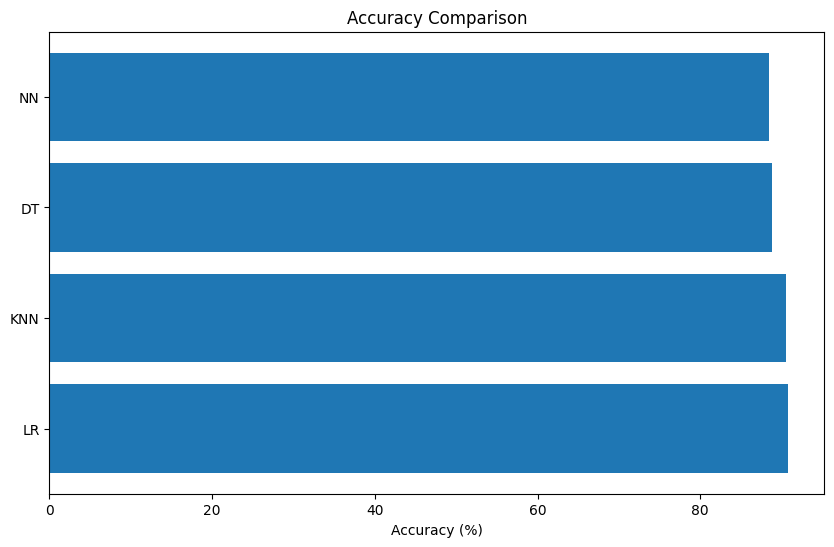

In [ ]:
models = list(acc_dict.keys())
accuracy = list(acc_dict.values())
plt.figure(figsize=(10, 6))
plt.barh(models, accuracy)
plt.xlabel('Accuracy (%)')
plt.title('Accuracy Comparison')
plt.show()

In [ ]:
best_model = max(acc_dict, key=acc_dict.get)
best_acc = round(acc_dict[best_model], 5)
print(f"Best accuracy: {best_acc}% ---> {best_model}")

Best accuracy: 90.734% ---> LR


**Neural Network by using TensorFlow**


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Dense(units = 16, activation = 'relu', input_dim = X_train.shape[1])) # first layer
model.add(Dense(units=24, activation='relu'))  # hidden layer
model.add(Dense(units=1, activation='sigmoid')) # final layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train model
history = model.fit(X_train, y_train, epochs = 10, batch_size=30)

Epoch 1/10
962/962 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8673 - loss: 1.1500
Epoch 2/10
962/962 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8717 - loss: 0.7682
Epoch 3/10
962/962 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8673 - loss: 0.8083
Epoch 4/10
962/962 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8725 - loss: 0.7984
Epoch 5/10
962/962 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8775 - loss: 0.7416
Epoch 6/10
962/962 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8835 - loss: 0.5859
Epoch 7/10
962/962 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8759 - loss: 0.7020
Epoch 8/10
962/962 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8836 - loss: 0.4961
Epoch 9/10
962/962 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8838 - loss: 0.4643
Epoch 10/10
962/962 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8841 - loss: 0.4978


loss curve

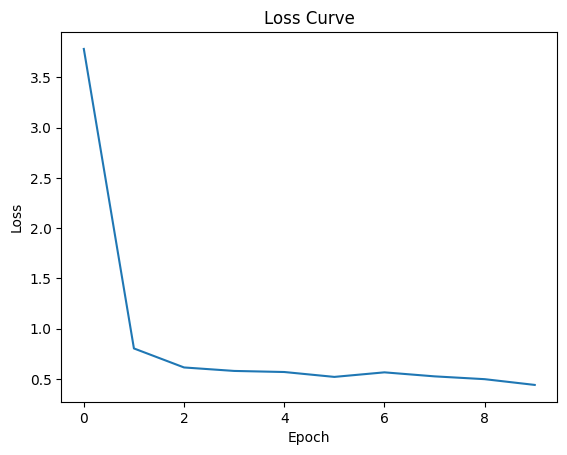

387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8861 - loss: 0.7089
Testing Accuracy: 88.41%


In [ ]:
plt.plot(history.history['loss'])
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

print(f"Testing Accuracy: {round(model.evaluate(X_test, y_test)[1] * 100, 2)}%")